##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE154826**

This dataset contains NSCLC data used by Merad (Maier 2020). GEO listing lists all sample as seperate file eg. GSE154826_amp_batch_ID_1.tar.gz

Files downloaded: 
* GSE154826_amp_batch_ID_10.tar.gz
* GSE154826_amp_batch_ID_11.tar.gz
* GSE154826_amp_batch_ID_14.tar.gz
* GSE154826_amp_batch_ID_15.tar.gz
* GSE154826_amp_batch_ID_16.tar.gz
* GSE154826_amp_batch_ID_17.tar.gz
* GSE154826_amp_batch_ID_18.tar.gz
* GSE154826_amp_batch_ID_19.tar.gz
* GSE154826_amp_batch_ID_1.tar.gz
* GSE154826_amp_batch_ID_22.tar.gz
* GSE154826_amp_batch_ID_230.tar.gz
* GSE154826_amp_batch_ID_231.tar.gz
* GSE154826_amp_batch_ID_23.tar.gz
* GSE154826_amp_batch_ID_244.tar.gz
* GSE154826_amp_batch_ID_245.tar.gz
* GSE154826_amp_batch_ID_24.tar.gz
* GSE154826_amp_batch_ID_25.tar.gz
* GSE154826_amp_batch_ID_26.tar.gz
* GSE154826_amp_batch_ID_27.tar.gz
* GSE154826_amp_batch_ID_28.tar.gz
* GSE154826_amp_batch_ID_292.tar.gz
* GSE154826_amp_batch_ID_293.tar.gz
* GSE154826_amp_batch_ID_29.tar.gz
* GSE154826_amp_batch_ID_2.tar.gz
* GSE154826_amp_batch_ID_307.tar.gz
* GSE154826_amp_batch_ID_308.tar.gz
* GSE154826_amp_batch_ID_309.tar.gz
* GSE154826_amp_batch_ID_30.tar.gz
* GSE154826_amp_batch_ID_31.tar.gz
* GSE154826_amp_batch_ID_32.tar.gz
* GSE154826_amp_batch_ID_33.tar.gz
* GSE154826_amp_batch_ID_342.tar.gz
* GSE154826_amp_batch_ID_343.tar.gz
* GSE154826_amp_batch_ID_344.tar.gz
* GSE154826_amp_batch_ID_345.tar.gz
* GSE154826_amp_batch_ID_346.tar.gz
* GSE154826_amp_batch_ID_347.tar.gz
* GSE154826_amp_batch_ID_348.tar.gz
* GSE154826_amp_batch_ID_350.tar.gz
* GSE154826_amp_batch_ID_351.tar.gz
* GSE154826_amp_batch_ID_36.tar.gz
* GSE154826_amp_batch_ID_37.tar.gz
* GSE154826_amp_batch_ID_38.tar.gz
* GSE154826_amp_batch_ID_39.tar.gz
* GSE154826_amp_batch_ID_3.tar.gz
* GSE154826_amp_batch_ID_40.tar.gz
* GSE154826_amp_batch_ID_41.tar.gz
* GSE154826_amp_batch_ID_42.tar.gz
* GSE154826_amp_batch_ID_43.tar.gz
* GSE154826_amp_batch_ID_44.tar.gz
* GSE154826_amp_batch_ID_45.tar.gz
* GSE154826_amp_batch_ID_46.tar.gz
* GSE154826_amp_batch_ID_47.tar.gz
* GSE154826_amp_batch_ID_48.tar.gz
* GSE154826_amp_batch_ID_49.tar.gz
* GSE154826_amp_batch_ID_4.tar.gz
* GSE154826_amp_batch_ID_50.tar.gz
* GSE154826_amp_batch_ID_51.tar.gz
* GSE154826_amp_batch_ID_52.tar.gz
* GSE154826_amp_batch_ID_53.tar.gz
* GSE154826_amp_batch_ID_54.tar.gz
* GSE154826_amp_batch_ID_55.tar.gz
* GSE154826_amp_batch_ID_56.tar.gz
* GSE154826_amp_batch_ID_5.tar.gz
* GSE154826_amp_batch_ID_668.tar.gz
* GSE154826_amp_batch_ID_6.tar.gz
* GSE154826_amp_batch_ID_7.tar.gz
* GSE154826_amp_batch_ID_88.tar.gz
* GSE154826_amp_batch_ID_89.tar.gz
* GSE154826_amp_batch_ID_8.tar.gz
* GSE154826_amp_batch_ID_90.tar.gz
* GSE154826_amp_batch_ID_91.tar.gz
* GSE154826_amp_batch_ID_92.tar.gz
* GSE154826_amp_batch_ID_93.tar.gz
* GSE154826_amp_batch_ID_94.tar.gz
* GSE154826_amp_batch_ID_95.tar.gz
* GSE154826_amp_batch_ID_9.tar.gz
* GSE154826_sample_annots.csv.gz

There were individually downloaded using their ftp links and then unzipped using tar -xvf

This gives the following files per downloaded sample: 
* 1_patient_370-normal_370_features.tsv
* 1_patient_370-normal_370_barcodes.tsv
* 1_patient_370-normal_370_matrix.mtx

Organised in to correct folders/ file names

A number of samples were excluded (moved to excluding folder) as either insufficient naming to tell if normal or tumour sample, or because they were sorted to T cells. See the excel file on i drive 'GSE154826_sample.xlsx' for details on all samples and their metadata (lUAD vs LUSC and Tumour vs Normal)




In [2]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE154826')
getwd()

[1] "/scratch/user/s4436039/scdata/GSE154778"

[1] "/scratch/user/s4436039/scdata/GSE154826"

In [3]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [4]:
annots <- read.csv("GSE154826_sample_annots.csv")

In [7]:
dim(annots)

[1] 119  12

In [3]:
#load all datasets
P01.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/P01") 
P02.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/P02") 
P03.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/P03") 
P04.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/P04") 
P05.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/P05") 
P06.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/P06") 
P07.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/P07") 
P08.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/P08") 
P09.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/P09") 
P10.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/P10") 
MET01.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/MET01") 
MET02.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/MET02") 
MET03.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/MET03") 
MET04.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/MET04") 
MET05.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/MET05") 
MET06.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154778/MET06") 

In [4]:
head(colnames(P01.data))
head(colnames(MET01.data))

[1] "AAACATACTCGTTT-1" "AAACCGTGGGTAGG-1" "AAAGCAGAACGTTG-1" "AAAGCAGACTGAGT-1"
[5] "AAAGGCCTGCTCCT-1" "AAATACTGTGGATC-1"

[1] "AAAGATGAGCCCGAAA-1" "AAAGATGAGTCAAGGC-1" "AAAGATGCAGCGAACA-1"
[4] "AAAGTAGGTACCTACA-1" "AACTCAGAGCAGCGTA-1" "AACTCTTAGTACGATA-1"

In [5]:
#Add dataset info to colnames
colnames(P01.data) <- paste0("GSE154778_PDAC_P01_", colnames(P01.data))
colnames(P02.data) <- paste0("GSE154778_PDAC_P02_", colnames(P02.data))
colnames(P03.data) <- paste0("GSE154778_PDAC_P03_", colnames(P03.data))
colnames(P04.data) <- paste0("GSE154778_PDAC_P04_", colnames(P04.data))
colnames(P05.data) <- paste0("GSE154778_PDAC_P05_", colnames(P05.data))
colnames(P06.data) <- paste0("GSE154778_PDAC_P06_", colnames(P06.data))
colnames(P07.data) <- paste0("GSE154778_PDAC_P07_", colnames(P07.data))
colnames(P08.data) <- paste0("GSE154778_PDAC_P08_", colnames(P08.data))
colnames(P09.data) <- paste0("GSE154778_PDAC_P09_", colnames(P09.data))
colnames(P10.data) <- paste0("GSE154778_PDAC_P10_", colnames(P10.data))
colnames(MET01.data) <- paste0("GSE154778_PDAC_MET01_", colnames(MET01.data))
colnames(MET02.data) <- paste0("GSE154778_PDAC_MET02_", colnames(MET02.data))
colnames(MET03.data) <- paste0("GSE154778_PDAC_MET03_", colnames(MET03.data))
colnames(MET04.data) <- paste0("GSE154778_PDAC_MET04_", colnames(MET04.data))
colnames(MET05.data) <- paste0("GSE154778_PDAC_MET05_", colnames(MET05.data))
colnames(MET06.data) <- paste0("GSE154778_PDAC_MET06_", colnames(MET06.data))

In [6]:
head(colnames(P01.data))
head(colnames(MET01.data))

[1] "GSE154778_PDAC_P01_AAACATACTCGTTT-1" "GSE154778_PDAC_P01_AAACCGTGGGTAGG-1"
[3] "GSE154778_PDAC_P01_AAAGCAGAACGTTG-1" "GSE154778_PDAC_P01_AAAGCAGACTGAGT-1"
[5] "GSE154778_PDAC_P01_AAAGGCCTGCTCCT-1" "GSE154778_PDAC_P01_AAATACTGTGGATC-1"

[1] "GSE154778_PDAC_MET01_AAAGATGAGCCCGAAA-1"
[2] "GSE154778_PDAC_MET01_AAAGATGAGTCAAGGC-1"
[3] "GSE154778_PDAC_MET01_AAAGATGCAGCGAACA-1"
[4] "GSE154778_PDAC_MET01_AAAGTAGGTACCTACA-1"
[5] "GSE154778_PDAC_MET01_AACTCAGAGCAGCGTA-1"
[6] "GSE154778_PDAC_MET01_AACTCTTAGTACGATA-1"

In [7]:
#create seperate seurat object for each sample
P01 <- CreateSeuratObject(counts = P01.data, project = "GSE154778", min.features = 200)
#add metadata to sample
P01@meta.data$sample_type <- "primary tumour"
P01@meta.data$cancer_type <- "PDAC"
P01@meta.data$patient_id <- "P01"
P01@meta.data$sample_id <- "GSE154778_PDAC_primary_01"

In [8]:
#create seperate seurat object for each sample
P02 <- CreateSeuratObject(counts = P02.data, project = "GSE154778", min.features = 200)
#add metadata to sample
P02@meta.data$sample_type <- "primary tumour"
P02@meta.data$cancer_type <- "PDAC"
P02@meta.data$patient_id <- "P02"
P02@meta.data$sample_id <- "GSE154778_PDAC_primary_02"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [9]:
#create seperate seurat object for each sample
P03 <- CreateSeuratObject(counts = P03.data, project = "GSE154778", min.features = 200)
#add metadata to sample
P03@meta.data$sample_type <- "primary tumour"
P03@meta.data$cancer_type <- "PDAC"
P03@meta.data$patient_id <- "P03"
P03@meta.data$sample_id <- "GSE154778_PDAC_primary_03"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [10]:
#create seperate seurat object for each sample
P04 <- CreateSeuratObject(counts = P04.data, project = "GSE154778", min.features =0400)
#add metadata to sample
P04@meta.data$sample_type <- "primary tumour"
P04@meta.data$cancer_type <- "PDAC"
P04@meta.data$patient_id <- "P04"
P04@meta.data$sample_id <- "GSE154778_PDAC_primary_04"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [11]:
#create seperate seurat object for each sample
P05 <- CreateSeuratObject(counts = P05.data, project = "GSE154778", min.features = 200)
#add metadata to sample
P05@meta.data$sample_type <- "primary tumour"
P05@meta.data$cancer_type <- "PDAC"
P05@meta.data$patient_id <- "P05"
P05@meta.data$sample_id <- "GSE154778_PDAC_primary_05"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [12]:
#create seperate seurat object for each sample
P06 <- CreateSeuratObject(counts = P06.data, project = "GSE154778", min.features = 200)
#add metadata to sample
P06@meta.data$sample_type <- "primary tumour"
P06@meta.data$cancer_type <- "PDAC"
P06@meta.data$patient_id <- "P06"
P06@meta.data$sample_id <- "GSE154778_PDAC_primary_06"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [13]:
#create seperate seurat object for each sample
P07 <- CreateSeuratObject(counts = P07.data, project = "GSE154778", min.features = 200)
#add metadata to sample
P07@meta.data$sample_type <- "primary tumour"
P07@meta.data$cancer_type <- "PDAC"
P07@meta.data$patient_id <- "P07"
P07@meta.data$sample_id <- "GSE154778_PDAC_primary_07"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [14]:
#create seperate seurat object for each sample
P08 <- CreateSeuratObject(counts = P08.data, project = "GSE154778", min.features = 200)
#add metadata to sample
P08@meta.data$sample_type <- "primary tumour"
P08@meta.data$cancer_type <- "PDAC"
P08@meta.data$patient_id <- "P08"
P08@meta.data$sample_id <- "GSE154778_PDAC_primary_08"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [15]:
#create seperate seurat object for each sample
P09 <- CreateSeuratObject(counts = P09.data, project = "GSE154778", min.features = 200)
#add metadata to sample
P09@meta.data$sample_type <- "primary tumour"
P09@meta.data$cancer_type <- "PDAC"
P09@meta.data$patient_id <- "P09"
P09@meta.data$sample_id <- "GSE154778_PDAC_primary_09"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [16]:
#create seperate seurat object for each sample
P10 <- CreateSeuratObject(counts = P10.data, project = "GSE154778", min.features = 200)
#add metadata to sample
P10@meta.data$sample_type <- "primary tumour"
P10@meta.data$cancer_type <- "PDAC"
P10@meta.data$patient_id <- "P10"
P10@meta.data$sample_id <- "GSE154778_PDAC_primary_10"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [17]:
#create seperate seurat object for each sample
MET01 <- CreateSeuratObject(counts = MET01.data, project = "GSE154778", min.features = 200)
#add metadata to sample
MET01@meta.data$sample_type <- "metastasis"
MET01@meta.data$cancer_type <- "PDAC"
MET01@meta.data$patient_id <- "MET01"
MET01@meta.data$sample_id <- "GSE154778_PDAC_mets_01"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [18]:
#create seperate seurat object for each sample
MET02 <- CreateSeuratObject(counts = MET02.data, project = "GSE154778", min.features = 200)
#add metadata to sample
MET02@meta.data$sample_type <- "metastasis"
MET02@meta.data$cancer_type <- "PDAC"
MET02@meta.data$patient_id <- "MET02"
MET02@meta.data$sample_id <- "GSE154778_PDAC_mets_02"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [19]:
#create seperate seurat object for each sample
MET03 <- CreateSeuratObject(counts = MET03.data, project = "GSE154778", min.features = 200)
#add metadata to sample
MET03@meta.data$sample_type <- "metastasis"
MET03@meta.data$cancer_type <- "PDAC"
MET03@meta.data$patient_id <- "MET03"
MET03@meta.data$sample_id <- "GSE154778_PDAC_mets_03"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [20]:
#create seperate seurat object for each sample
MET04 <- CreateSeuratObject(counts = MET04.data, project = "GSE154778", min.features = 200)
#add metadata to sample
MET04@meta.data$sample_type <- "metastasis"
MET04@meta.data$cancer_type <- "PDAC"
MET04@meta.data$patient_id <- "MET04"
MET04@meta.data$sample_id <- "GSE154778_PDAC_mets_04"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [21]:
#create seperate seurat object for each sample
MET05 <- CreateSeuratObject(counts = MET05.data, project = "GSE154778", min.features = 200)
#add metadata to sample
MET05@meta.data$sample_type <- "metastasis"
MET05@meta.data$cancer_type <- "PDAC"
MET05@meta.data$patient_id <- "MET05"
MET05@meta.data$sample_id <- "GSE154778_PDAC_mets_05"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [22]:
#create seperate seurat object for each sample
MET06 <- CreateSeuratObject(counts = MET06.data, project = "GSE154778", min.features = 200)
#add metadata to sample
MET06@meta.data$sample_type <- "metastasis"
MET06@meta.data$cancer_type <- "PDAC"
MET06@meta.data$patient_id <- "MET06"
MET06@meta.data$sample_id <- "GSE154778_PDAC_mets_06"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [23]:
head(P04@meta.data) 
head(MET03@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE154778_PDAC_P04_AAACCTGAGTTTGCGT-1 GSE154778  2965       1312        
GSE154778_PDAC_P04_AAAGATGGTCTTTCAT-1 GSE154778   519        403        
GSE154778_PDAC_P04_AAAGTAGTCTATCGCC-1 GSE154778   610        482        
GSE154778_PDAC_P04_AAATGCCCATTAGCCA-1 GSE154778   784        537        
GSE154778_PDAC_P04_AAATGCCGTCACTTCC-1 GSE154778   720        519        
GSE154778_PDAC_P04_AACACGTAGAAGGACA-1 GSE154778  1392        778        
                                      sample_type    cancer_type patient_id
GSE154778_PDAC_P04_AAACCTGAGTTTGCGT-1 primary tumour PDAC        P04       
GSE154778_PDAC_P04_AAAGATGGTCTTTCAT-1 primary tumour PDAC        P04       
GSE154778_PDAC_P04_AAAGTAGTCTATCGCC-1 primary tumour PDAC        P04       
GSE154778_PDAC_P04_AAATGCCCATTAGCCA-1 primary tumour PDAC        P04       
GSE154778_PDAC_P04_AAATGCCGTCACTTCC-1 primary tumour PDAC        P04       
GSE154778_PDAC_P04_AACACGTAGAAGGACA-1 primary tumour PDAC        P04       
                                      sample_id                
GSE154778_PDAC_P04_AAACCTGAGTTTGCGT-1 GSE154778_PDAC_primary_04
GSE154778_PDAC_P04_AAAGATGGTCTTTCAT-1 GSE154778_PDAC_primary_04
GSE154778_PDAC_P04_AAAGTAGTCTATCGCC-1 GSE154778_PDAC_primary_04
GSE154778_PDAC_P04_AAATGCCCATTAGCCA-1 GSE154778_PDAC_primary_04
GSE154778_PDAC_P04_AAATGCCGTCACTTCC-1 GSE154778_PDAC_primary_04
GSE154778_PDAC_P04_AACACGTAGAAGGACA-1 GSE154778_PDAC_primary_04

orig.ident nCount_RNA nFeature_RNA
GSE154778_PDAC_MET03_AAACCTGAGAGTACCG-1 GSE154778  13435      3724        
GSE154778_PDAC_MET03_AAAGATGCAACACCCG-1 GSE154778   1394       613        
GSE154778_PDAC_MET03_AAATGCCCACATCCGG-1 GSE154778  11666      3645        
GSE154778_PDAC_MET03_AAATGCCCAGGTCTCG-1 GSE154778   4674      1613        
GSE154778_PDAC_MET03_AACACGTTCAGCAACT-1 GSE154778  22032      4352        
GSE154778_PDAC_MET03_AACCATGCACACCGAC-1 GSE154778   4077      1775        
                                        sample_type cancer_type patient_id
GSE154778_PDAC_MET03_AAACCTGAGAGTACCG-1 metastasis  PDAC        MET03     
GSE154778_PDAC_MET03_AAAGATGCAACACCCG-1 metastasis  PDAC        MET03     
GSE154778_PDAC_MET03_AAATGCCCACATCCGG-1 metastasis  PDAC        MET03     
GSE154778_PDAC_MET03_AAATGCCCAGGTCTCG-1 metastasis  PDAC        MET03     
GSE154778_PDAC_MET03_AACACGTTCAGCAACT-1 metastasis  PDAC        MET03     
GSE154778_PDAC_MET03_AACCATGCACACCGAC-1 metastasis  PDAC        MET03     
                                        sample_id             
GSE154778_PDAC_MET03_AAACCTGAGAGTACCG-1 GSE154778_PDAC_mets_03
GSE154778_PDAC_MET03_AAAGATGCAACACCCG-1 GSE154778_PDAC_mets_03
GSE154778_PDAC_MET03_AAATGCCCACATCCGG-1 GSE154778_PDAC_mets_03
GSE154778_PDAC_MET03_AAATGCCCAGGTCTCG-1 GSE154778_PDAC_mets_03
GSE154778_PDAC_MET03_AACACGTTCAGCAACT-1 GSE154778_PDAC_mets_03
GSE154778_PDAC_MET03_AACCATGCACACCGAC-1 GSE154778_PDAC_mets_03

In [24]:
#Merge seurat objects
PDAC <- merge(P01, y = c(P02, P03, P04, P05, P06, P07, P08, P09, P10, MET01, MET02, MET03, MET04, MET05, MET06), project = "GSE154778")

In [25]:
PDAC
head(PDAC@meta.data)
tail(PDAC@meta.data)

An object of class Seurat 
51911 features across 15420 samples within 1 assay 
Active assay: RNA (51911 features, 0 variable features)
 16 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16

orig.ident nCount_RNA nFeature_RNA
GSE154778_PDAC_P01_AAACATACTCGTTT-1 GSE154778   2464       965        
GSE154778_PDAC_P01_AAACCGTGGGTAGG-1 GSE154778    689       336        
GSE154778_PDAC_P01_AAAGCAGAACGTTG-1 GSE154778   7145      1919        
GSE154778_PDAC_P01_AAAGCAGACTGAGT-1 GSE154778   1655       621        
GSE154778_PDAC_P01_AAAGGCCTGCTCCT-1 GSE154778  14272      2771        
GSE154778_PDAC_P01_AAATACTGTGGATC-1 GSE154778  13832      2541        
                                    sample_type    cancer_type patient_id
GSE154778_PDAC_P01_AAACATACTCGTTT-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAACCGTGGGTAGG-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAAGCAGAACGTTG-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAAGCAGACTGAGT-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAAGGCCTGCTCCT-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAATACTGTGGATC-1 primary tumour PDAC        P01       
                                    sample_id                
GSE154778_PDAC_P01_AAACATACTCGTTT-1 GSE154778_PDAC_primary_01
GSE154778_PDAC_P01_AAACCGTGGGTAGG-1 GSE154778_PDAC_primary_01
GSE154778_PDAC_P01_AAAGCAGAACGTTG-1 GSE154778_PDAC_primary_01
GSE154778_PDAC_P01_AAAGCAGACTGAGT-1 GSE154778_PDAC_primary_01
GSE154778_PDAC_P01_AAAGGCCTGCTCCT-1 GSE154778_PDAC_primary_01
GSE154778_PDAC_P01_AAATACTGTGGATC-1 GSE154778_PDAC_primary_01

orig.ident nCount_RNA nFeature_RNA
GSE154778_PDAC_MET06_TTTGGTTTCAGATAAG-1 GSE154778   3024      1359        
GSE154778_PDAC_MET06_TTTGTCAGTAGCGTAG-1 GSE154778  11516      3050        
GSE154778_PDAC_MET06_TTTGTCATCAAACGGG-1 GSE154778   2471      1177        
GSE154778_PDAC_MET06_TTTGTCATCACAGTAC-1 GSE154778   4017      1620        
GSE154778_PDAC_MET06_TTTGTCATCACCTCGT-1 GSE154778   5564      2044        
GSE154778_PDAC_MET06_TTTGTCATCGTCCAGG-1 GSE154778   4242      1425        
                                        sample_type cancer_type patient_id
GSE154778_PDAC_MET06_TTTGGTTTCAGATAAG-1 metastasis  PDAC        MET06     
GSE154778_PDAC_MET06_TTTGTCAGTAGCGTAG-1 metastasis  PDAC        MET06     
GSE154778_PDAC_MET06_TTTGTCATCAAACGGG-1 metastasis  PDAC        MET06     
GSE154778_PDAC_MET06_TTTGTCATCACAGTAC-1 metastasis  PDAC        MET06     
GSE154778_PDAC_MET06_TTTGTCATCACCTCGT-1 metastasis  PDAC        MET06     
GSE154778_PDAC_MET06_TTTGTCATCGTCCAGG-1 metastasis  PDAC        MET06     
                                        sample_id             
GSE154778_PDAC_MET06_TTTGGTTTCAGATAAG-1 GSE154778_PDAC_mets_06
GSE154778_PDAC_MET06_TTTGTCAGTAGCGTAG-1 GSE154778_PDAC_mets_06
GSE154778_PDAC_MET06_TTTGTCATCAAACGGG-1 GSE154778_PDAC_mets_06
GSE154778_PDAC_MET06_TTTGTCATCACAGTAC-1 GSE154778_PDAC_mets_06
GSE154778_PDAC_MET06_TTTGTCATCACCTCGT-1 GSE154778_PDAC_mets_06
GSE154778_PDAC_MET06_TTTGTCATCGTCCAGG-1 GSE154778_PDAC_mets_06

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


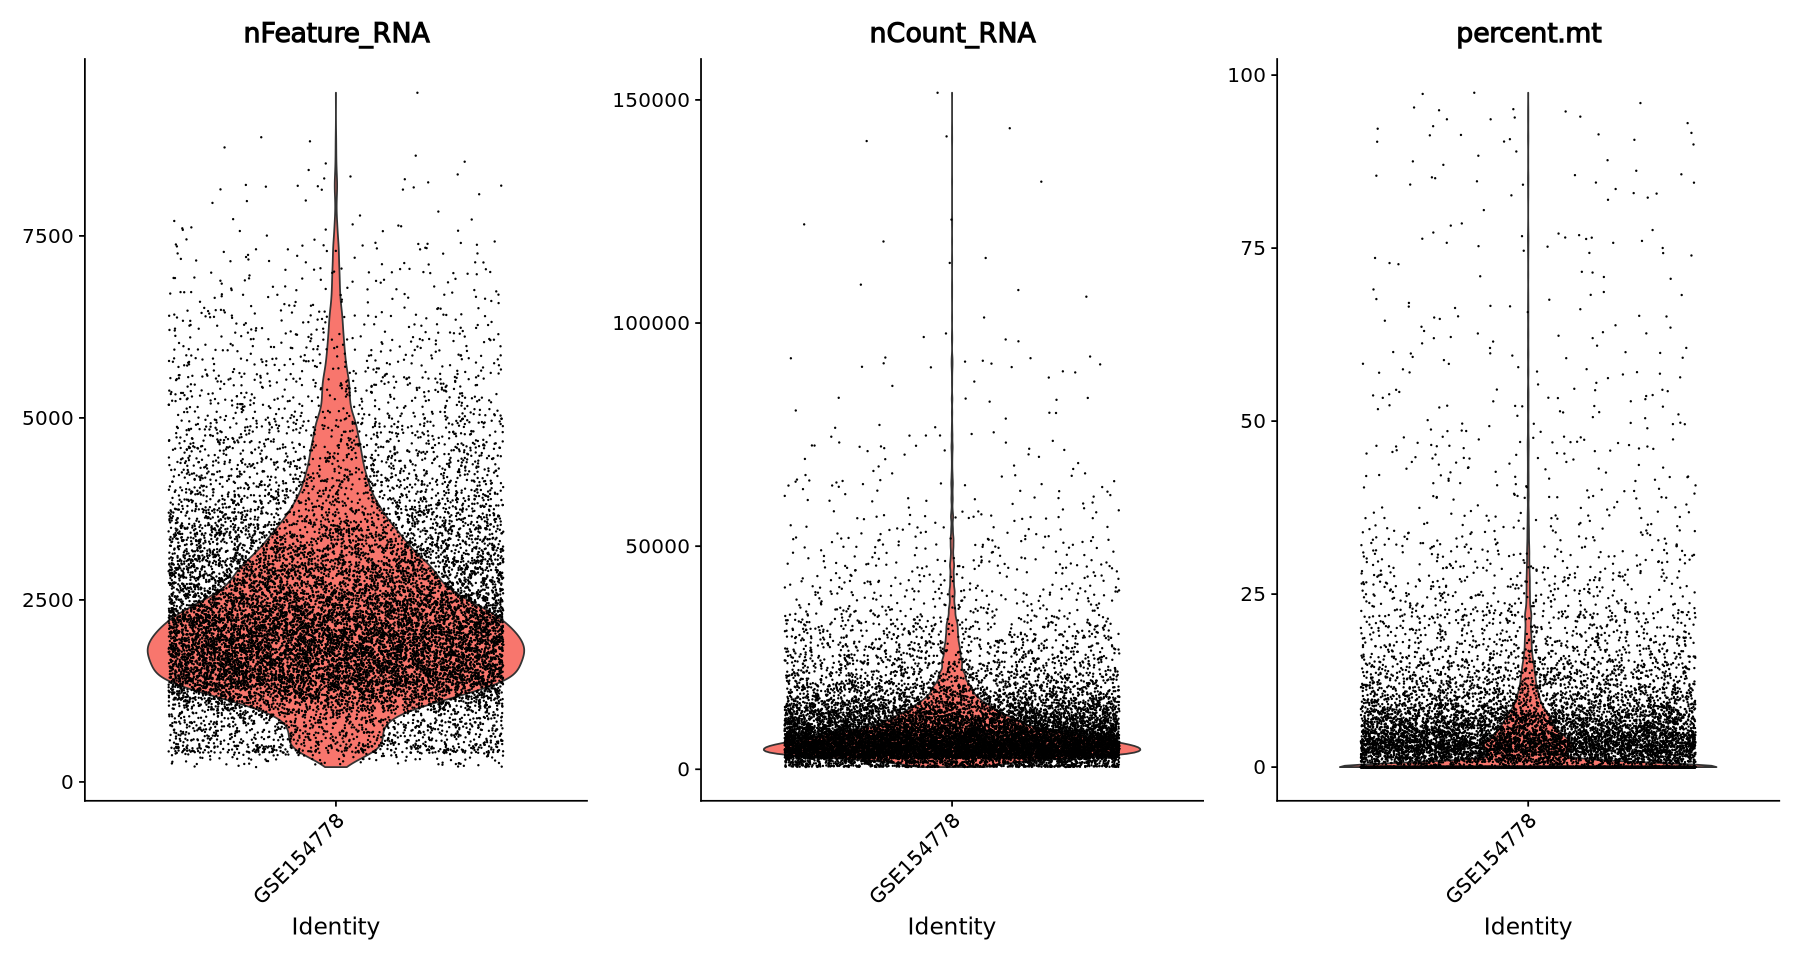

In [26]:
#QC Steps 
PDAC[["percent.mt"]] <- PercentageFeatureSet(PDAC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(PDAC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [27]:
#Normalise the data
PDAC <- NormalizeData(PDAC)

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Normalizing layer: counts.13

Normalizing layer: counts.14

Normalizing layer: counts.15

Normalizing layer: counts.16



In [28]:
#Find variable features
PDAC <- FindVariableFeatures(PDAC, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Finding variable features for layer counts.9

Finding variable features for layer counts.10

Finding variable features for layer counts.11

Finding variable features for layer counts.12

Finding variable features for layer counts.13

Finding variable features for layer counts.14

Finding variable features for layer counts.15

Finding variable features for layer counts.16



In [29]:
#Scale the data
PDAC <- ScaleData(PDAC, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [30]:
#Run PCA
PDAC <- RunPCA(PDAC, features = VariableFeatures(object = PDAC))

PC_ 1 
Positive:  KRT18, KRT8, KRT19, FXYD3, EPCAM, SMIM22, PERP, CLDN4, MAL2, AGR2 
	   OCIAD2, SPINT2, S100A6, TM4SF1, ELF3, SPINK1, TSPAN8, TACSTD2, GPRC5A, LSR 
	   CLDN7, NQO1, MUC1, TMC5, S100A14, C19orf33, LCN2, ATP1B1, GPX2, ITGA6 
Negative:  VIM, LGALS1, SPARC, COL1A2, IGFBP7, DCN, LUM, SERPINF1, COL1A1, COL3A1 
	   BGN, CALD1, FN1, AEBP1, C1S, NUPR1, MMP2, C1R, COL6A3, CTHRC1 
	   PMP22, TAGLN, SFRP2, MGP, THY1, COL6A2, SERPING1, RAB31, CLEC11A, ID3 
PC_ 2 
Positive:  TYROBP, LAPTM5, FCER1G, AIF1, SRGN, LST1, SPI1, HLA-DPA1, HLA-DRA, MS4A6A 
	   MS4A7, HLA-DQA1, HLA-DPB1, FCGR3A, C1orf162, C1QA, C1QC, HLA-DQB1, OLR1, CD53 
	   HLA-DRB1, C1QB, CYBB, HLA-DMB, ALOX5AP, FCGR2A, CD74, CD68, CD37, CLEC7A 
Negative:  CALD1, BGN, DCN, MYL9, C1S, AEBP1, LUM, COL6A2, COL3A1, C1R 
	   COL1A2, IGFBP7, SPARC, COL1A1, COL6A3, THY1, MXRA8, CNN3, RARRES2, PCOLCE 
	   SFRP2, FSTL1, FBLN1, CCDC80, CTHRC1, TAGLN, COL5A2, ASPN, MGP, THBS2 
PC_ 3 
Positive:  JUN, REG1A, PRSS1, FOS, TFF2, ATF3, CP

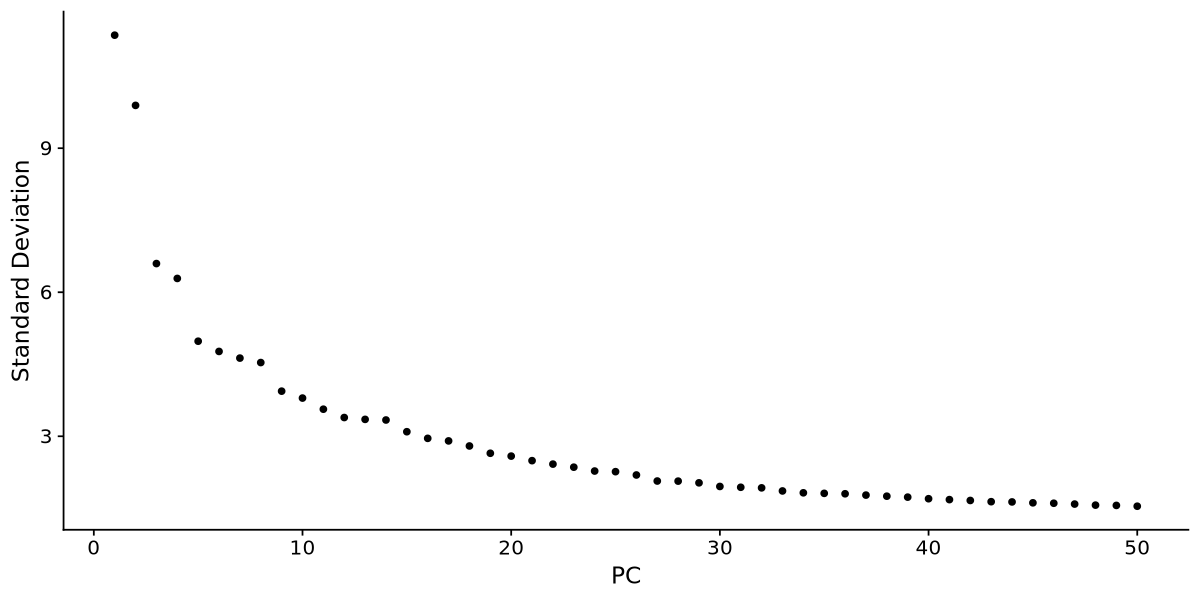

In [31]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(PDAC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [32]:
#Find neighbours (make sure number matches no. features chosen above)
PDAC <- FindNeighbors(PDAC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [33]:
#Run UMAP
PDAC <- RunUMAP(PDAC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


13:28:02 UMAP embedding parameters a = 0.9922 b = 1.112

13:28:02 Read 15420 rows and found 40 numeric columns

13:28:02 Using Annoy for neighbor search, n_neighbors = 30

13:28:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:28:03 Writing NN index file to temp file /scratch/temp/9777628/RtmpWcZPlO/file192d1159e335

13:28:03 Searching Annoy index using 1 thread, search_k = 3000

13:28:07 Annoy recall = 100%

13:28:07 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:28:08 Initializing from normalized Laplacian + noise (using RSpectra)

13:28:09 Commencing optimization for 200 epochs, with 654356 positive edges

13:28:16 Optimization finished



In [34]:
#Cluster, resolution here set to 0.2
PDAC <- FindClusters(PDAC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15420
Number of edges: 562678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9741
Number of communities: 15
Elapsed time: 1 seconds


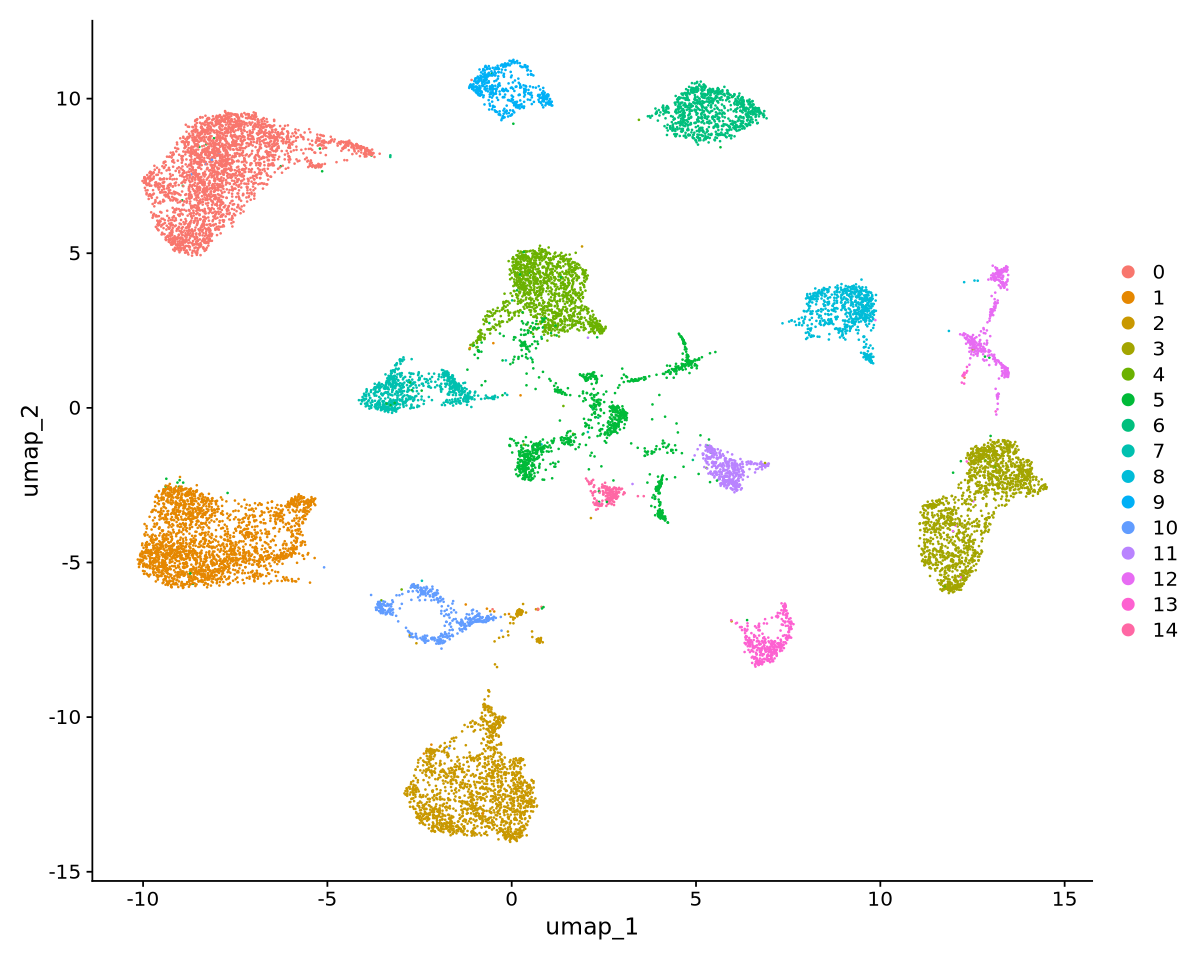

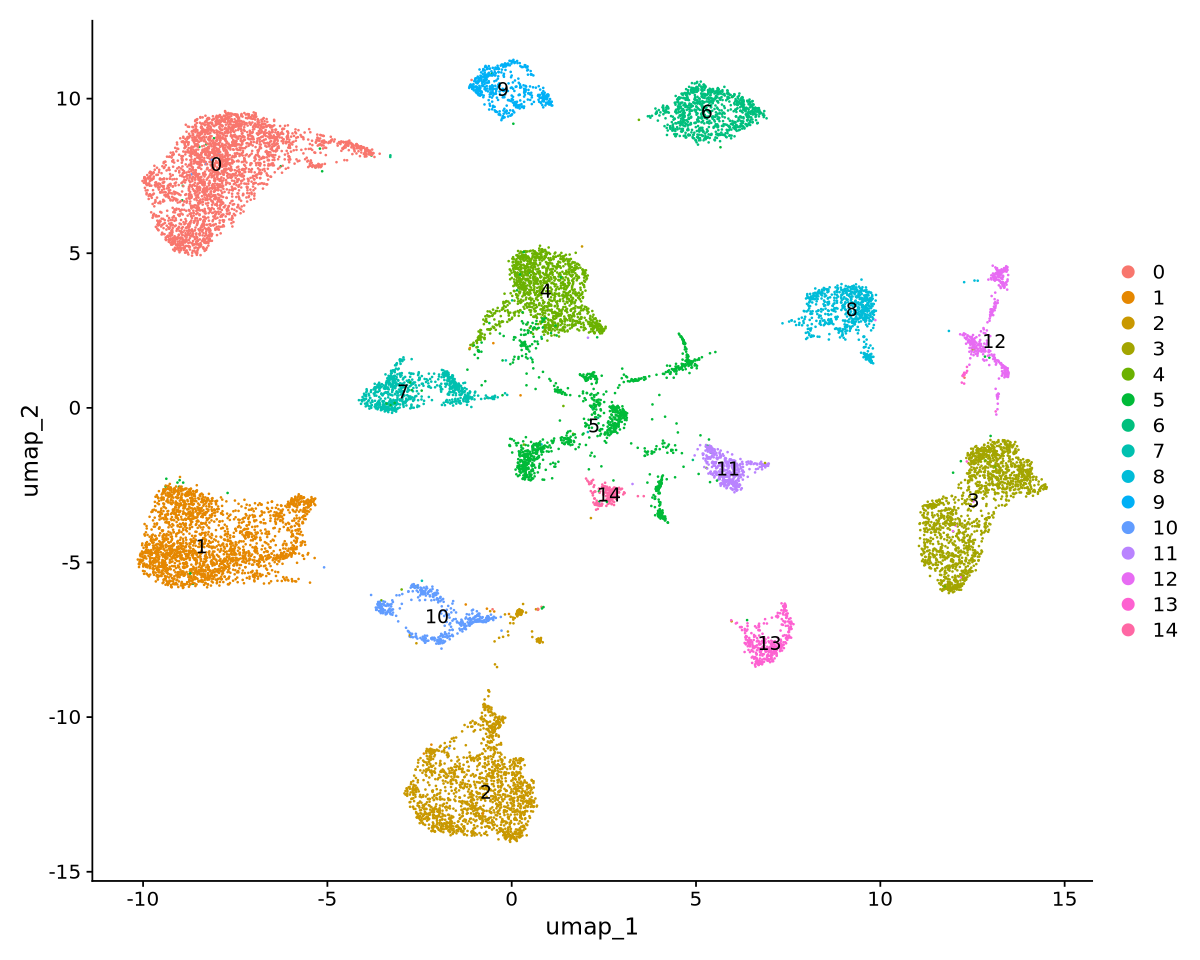

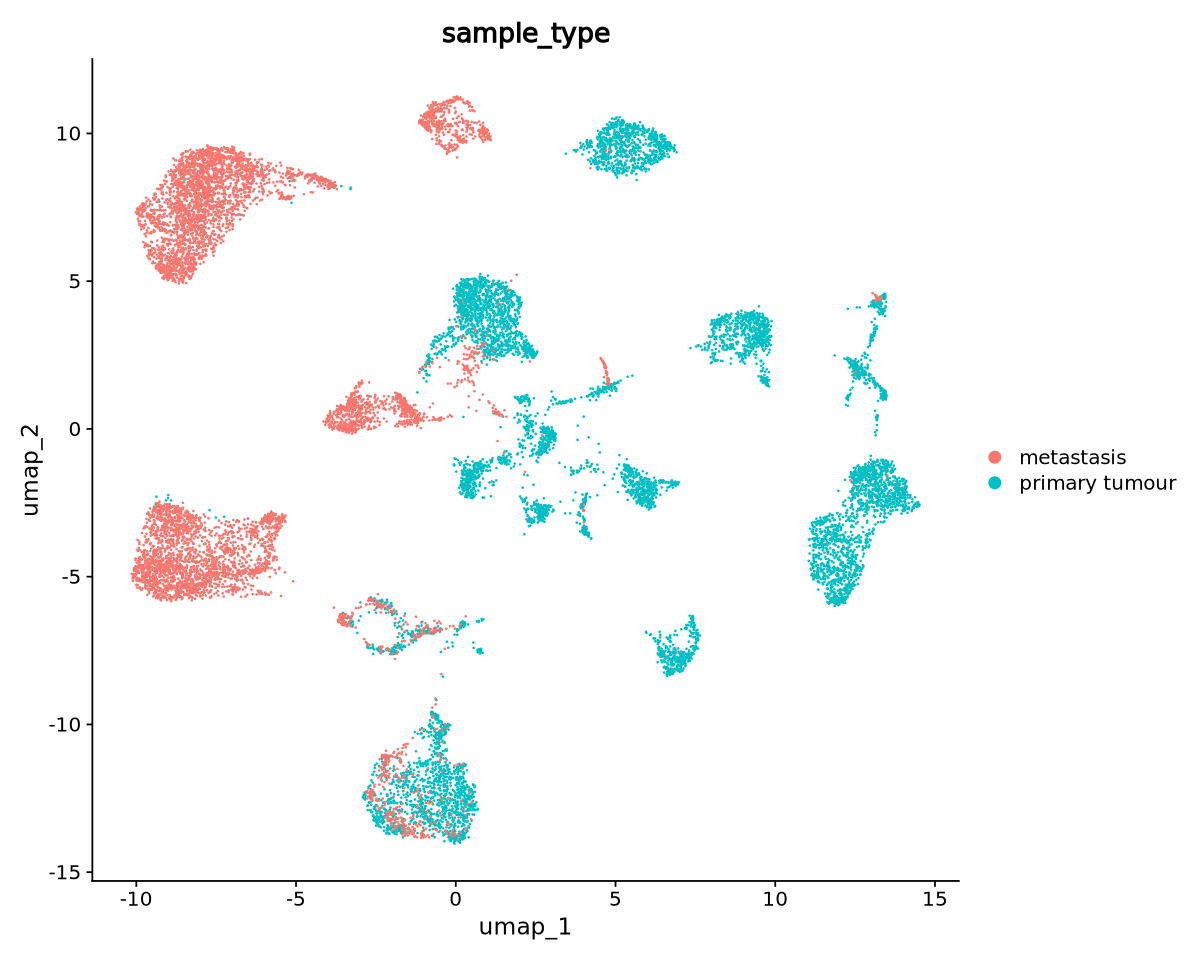

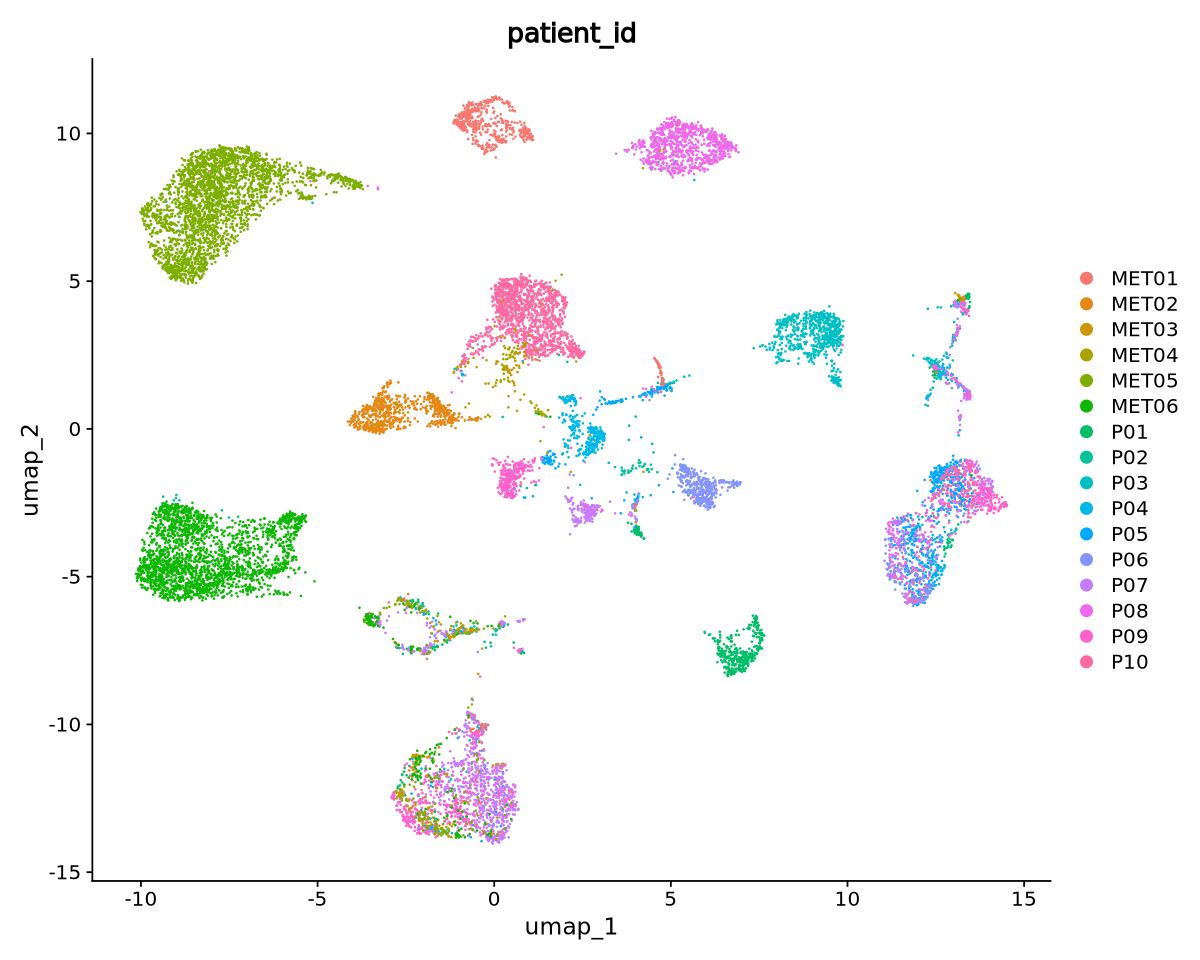

In [35]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(PDAC, reduction = "umap")
DimPlot(PDAC, reduction = "umap", label=TRUE)
DimPlot(PDAC, reduction = "umap", group = "sample_type")
DimPlot(PDAC, reduction = "umap", group = "patient_id")

In [36]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(PDAC, file = "/scratch/user/s4436039/scdata/GSE154778/GSE154778.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

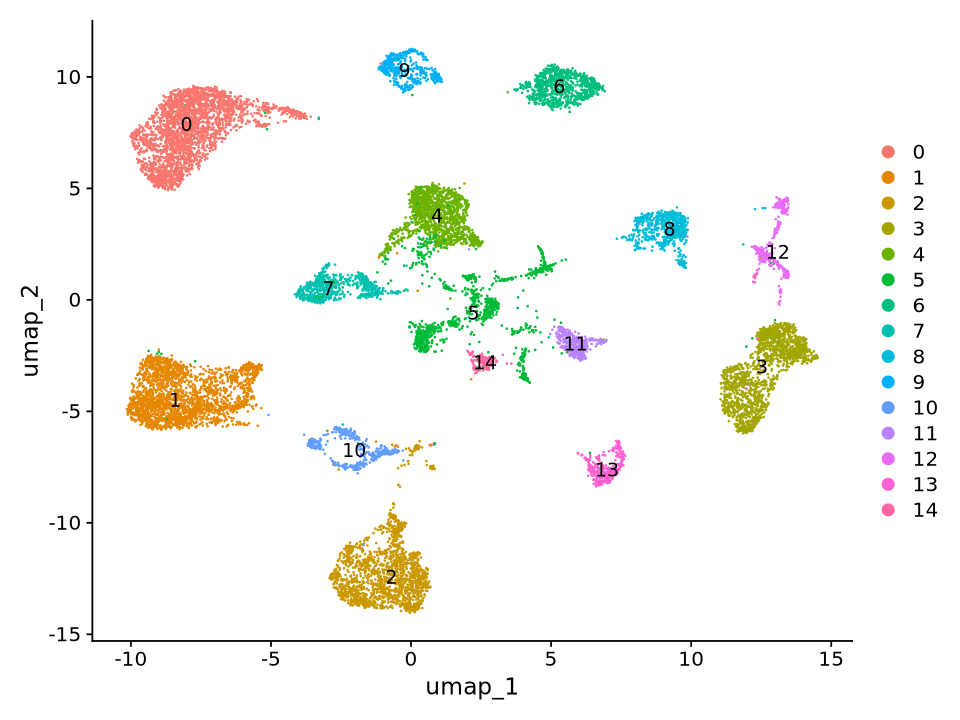

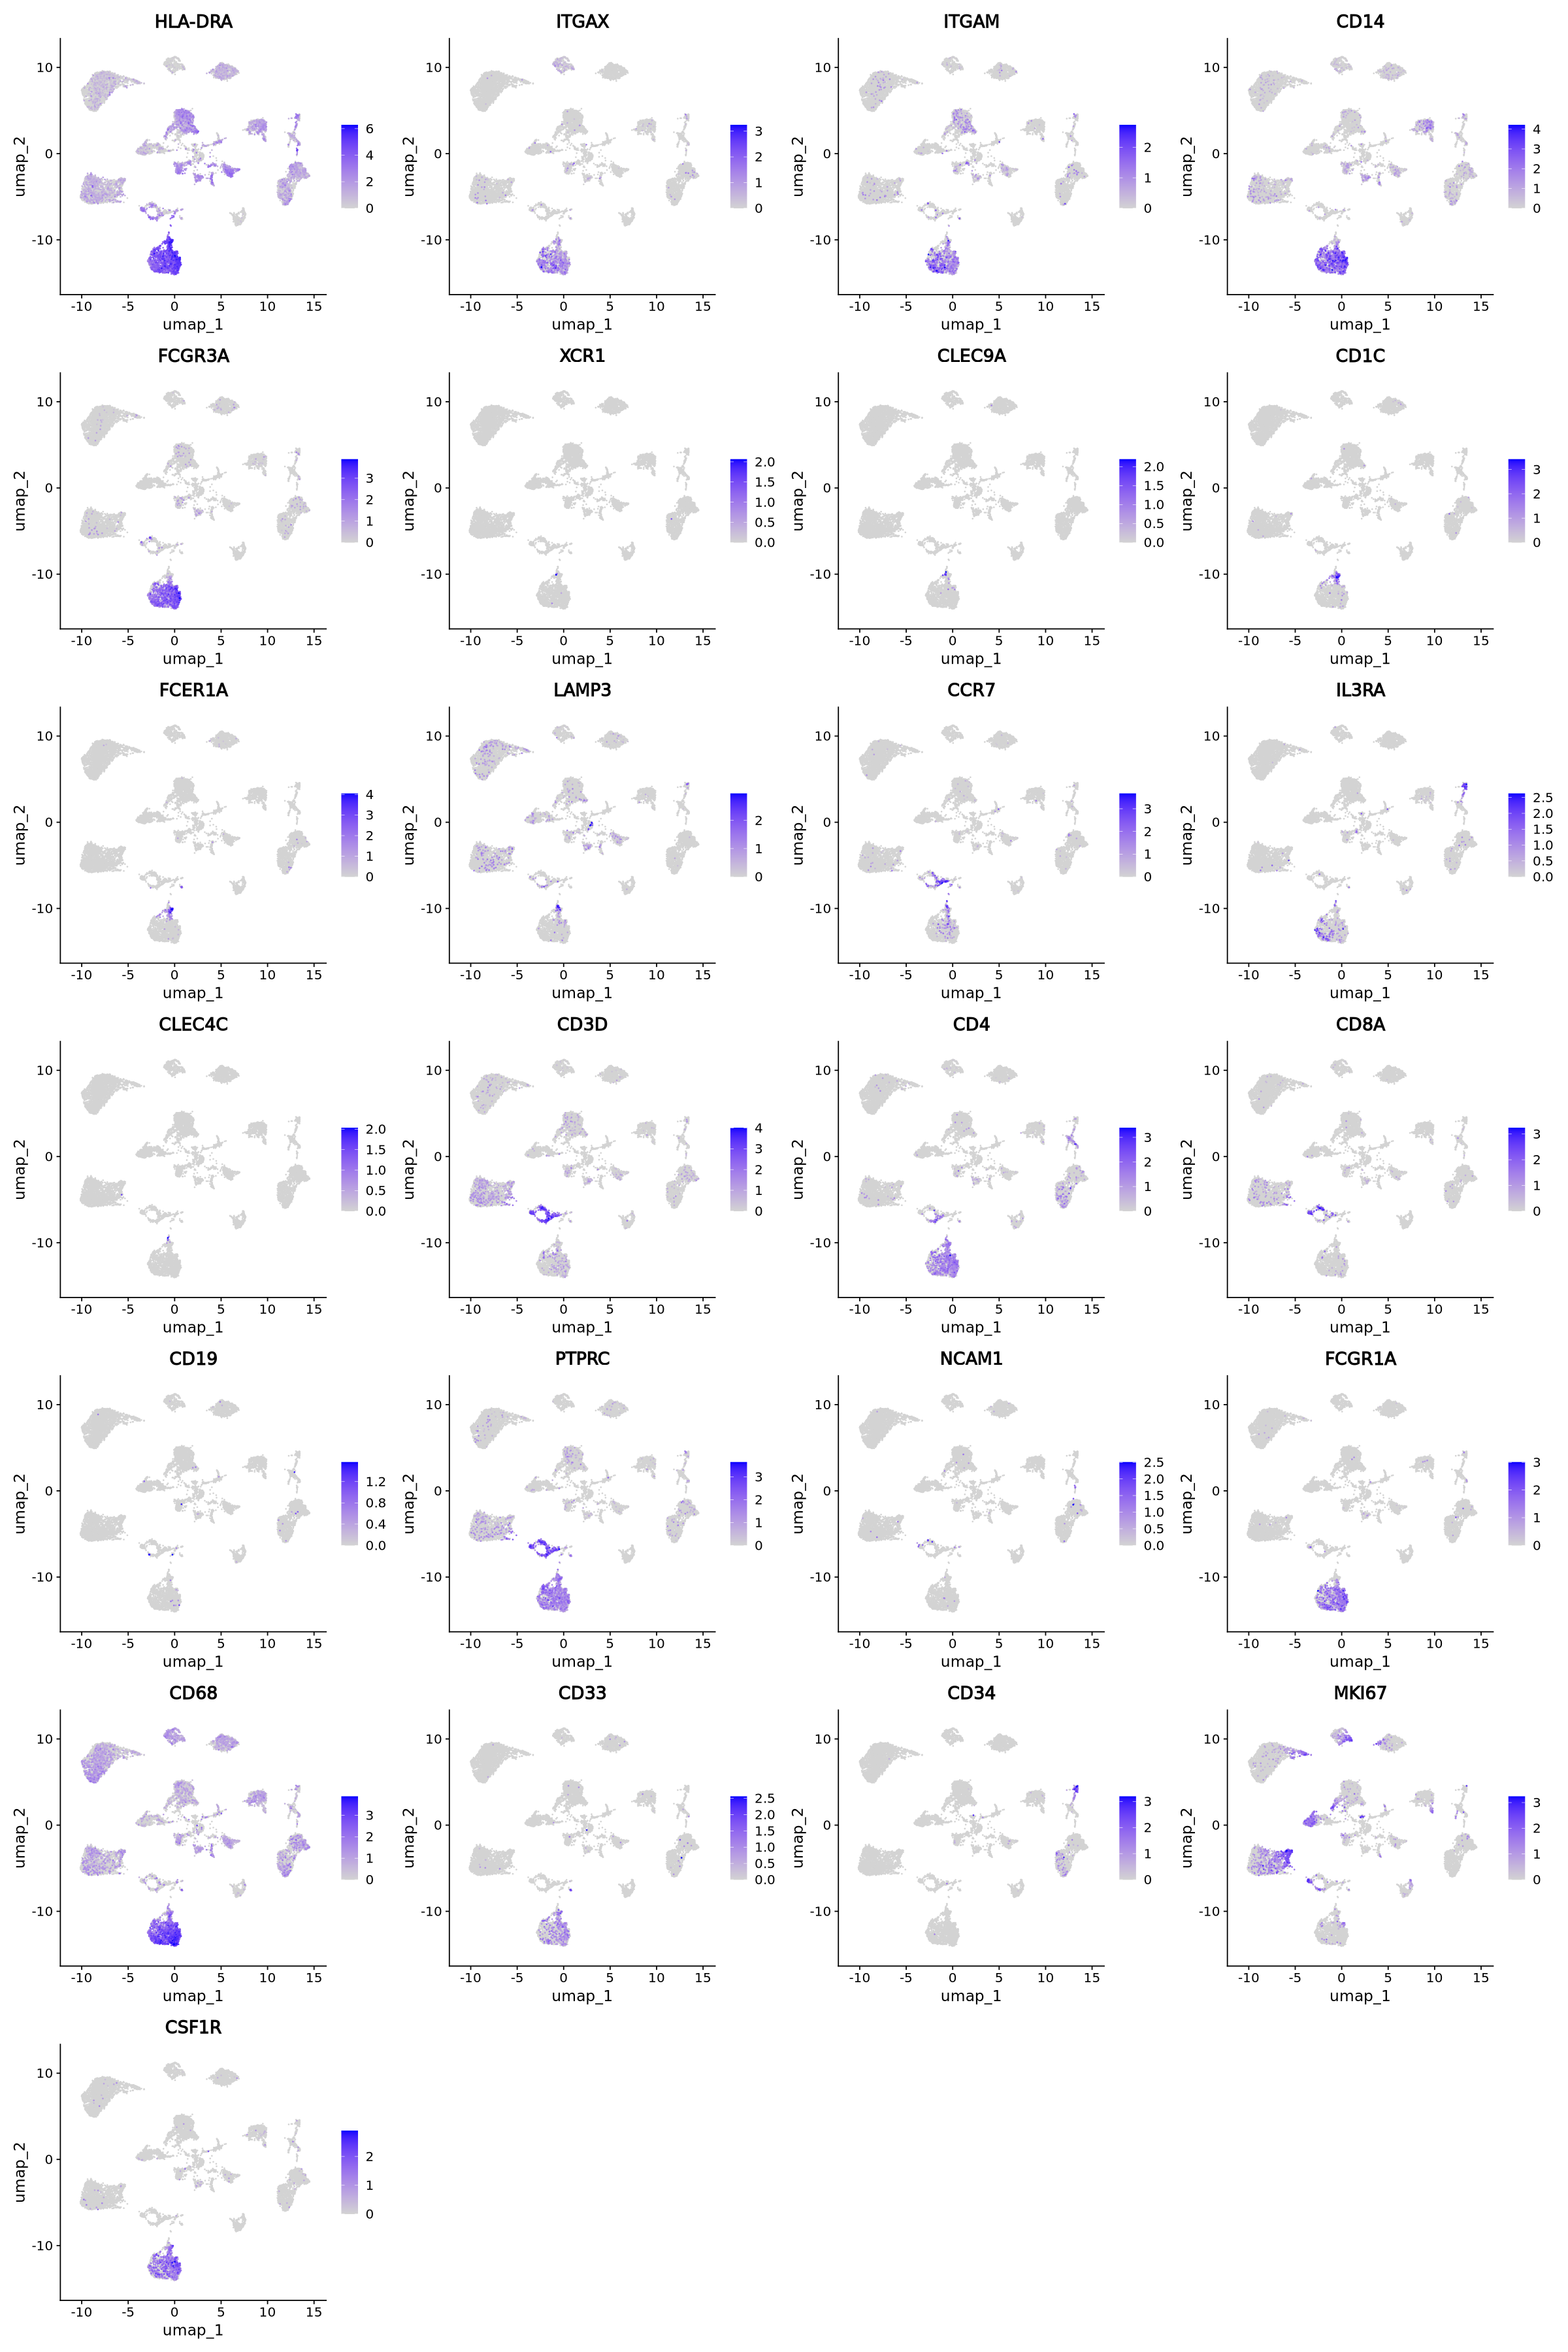

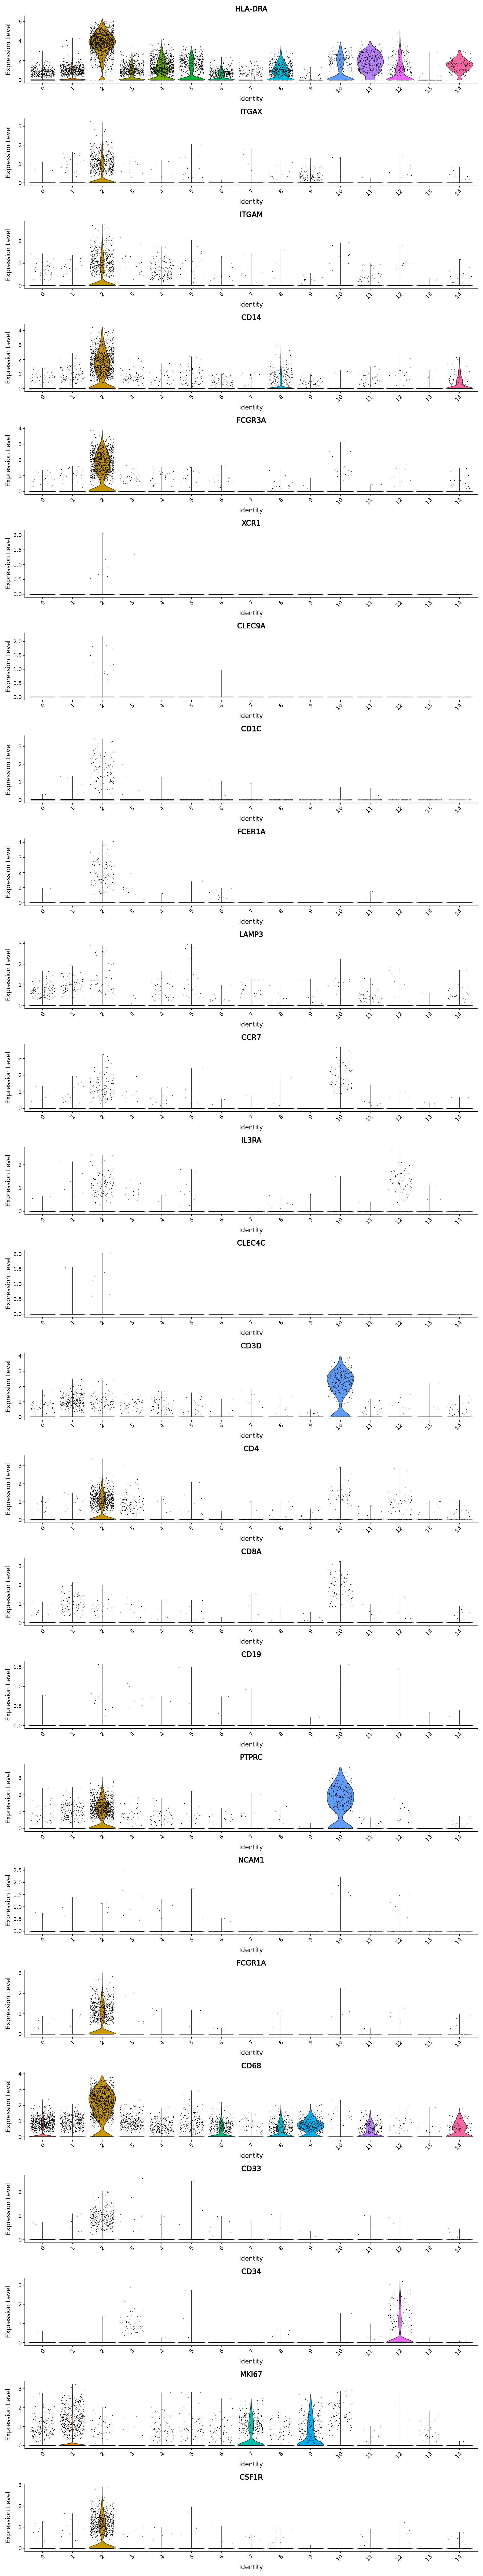

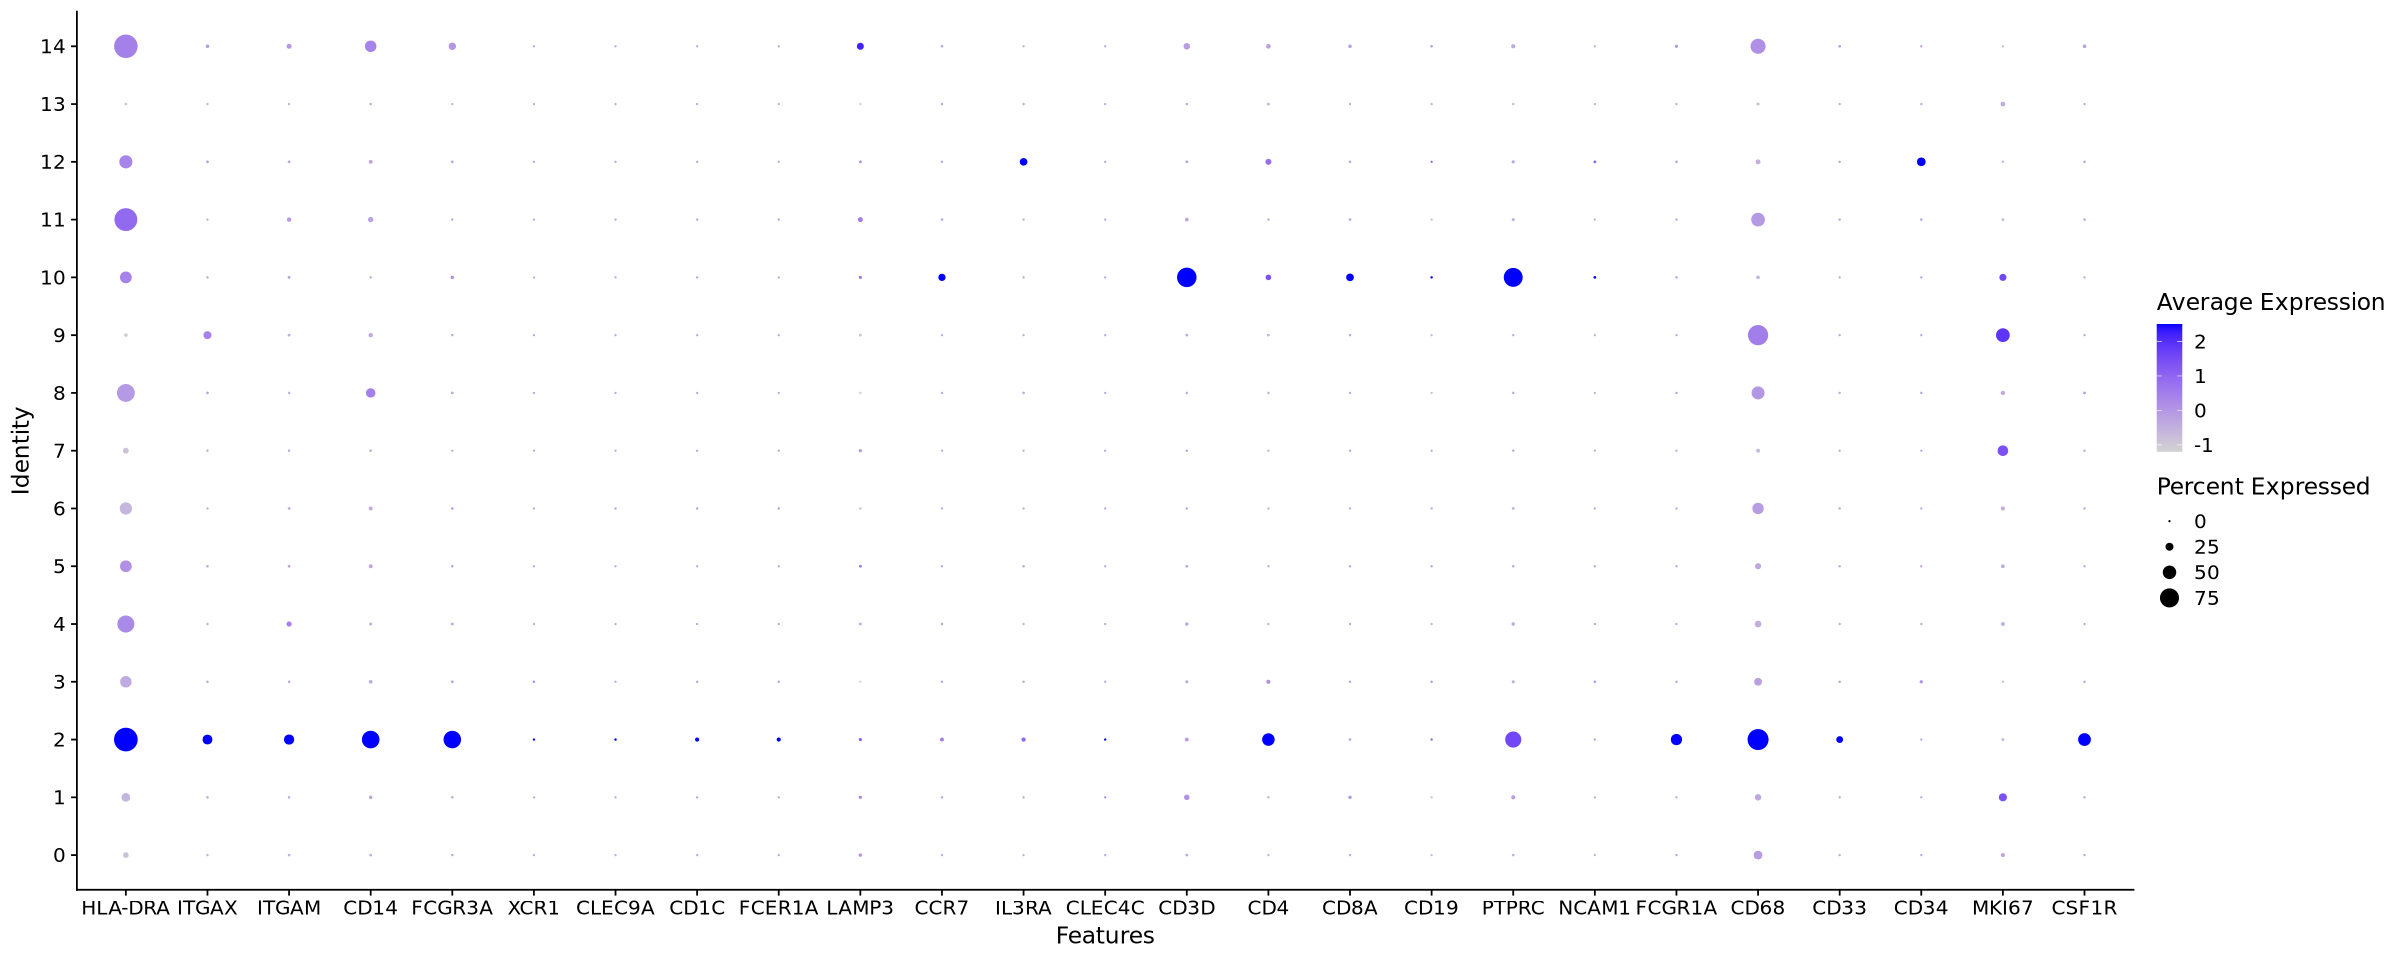

In [37]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(PDAC, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like cluster 2 is the myeloid cells, now subsetting out this clusters

In [38]:
head(PDAC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE154778_PDAC_P01_AAACATACTCGTTT-1 GSE154778   2464       965        
GSE154778_PDAC_P01_AAACCGTGGGTAGG-1 GSE154778    689       336        
GSE154778_PDAC_P01_AAAGCAGAACGTTG-1 GSE154778   7145      1919        
GSE154778_PDAC_P01_AAAGCAGACTGAGT-1 GSE154778   1655       621        
GSE154778_PDAC_P01_AAAGGCCTGCTCCT-1 GSE154778  14272      2771        
GSE154778_PDAC_P01_AAATACTGTGGATC-1 GSE154778  13832      2541        
                                    sample_type    cancer_type patient_id
GSE154778_PDAC_P01_AAACATACTCGTTT-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAACCGTGGGTAGG-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAAGCAGAACGTTG-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAAGCAGACTGAGT-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAAGGCCTGCTCCT-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAATACTGTGGATC-1 primary tumour PDAC        P01       
                                    sample_id                 percent.mt
GSE154778_PDAC_P01_AAACATACTCGTTT-1 GSE154778_PDAC_primary_01 12.6623377
GSE154778_PDAC_P01_AAACCGTGGGTAGG-1 GSE154778_PDAC_primary_01  2.1770682
GSE154778_PDAC_P01_AAAGCAGAACGTTG-1 GSE154778_PDAC_primary_01  2.4492652
GSE154778_PDAC_P01_AAAGCAGACTGAGT-1 GSE154778_PDAC_primary_01  2.1752266
GSE154778_PDAC_P01_AAAGGCCTGCTCCT-1 GSE154778_PDAC_primary_01  1.5414798
GSE154778_PDAC_P01_AAATACTGTGGATC-1 GSE154778_PDAC_primary_01  0.3181029
                                    RNA_snn_res.0.2 seurat_clusters
GSE154778_PDAC_P01_AAACATACTCGTTT-1 5               5              
GSE154778_PDAC_P01_AAACCGTGGGTAGG-1 3               3              
GSE154778_PDAC_P01_AAAGCAGAACGTTG-1 13              13             
GSE154778_PDAC_P01_AAAGCAGACTGAGT-1 13              13             
GSE154778_PDAC_P01_AAAGGCCTGCTCCT-1 13              13             
GSE154778_PDAC_P01_AAATACTGTGGATC-1 13              13

In [39]:
myeloid_PDAC <- subset(PDAC, subset = RNA_snn_res.0.2 %in% c("2"))

In [40]:
PDAC
myeloid_PDAC

An object of class Seurat 
51911 features across 15420 samples within 1 assay 
Active assay: RNA (51911 features, 2000 variable features)
 33 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
51911 features across 1718 samples within 1 assay 
Active assay: RNA (51911 features, 2000 variable features)
 31 layers present: counts.1, counts.2, counts.3, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, data.1, data.2, data.3, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, scale.data
 2 dimensional reductions calculated: pca, umap

In [41]:
saveRDS(myeloid_PDAC, "/scratch/user/s4436039/scdata/GSE154778/GSE154778_myeloid.RDS")

#### Following the above then need to move entire GSE154778 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE154778/ /QRISdata/Q5935/nikita/scdata/GSE154778
```